In [1]:
# Import our dependencies
# Conflict 1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from pathlib import Path

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def preprocessFile(filename = Path('../Data/AdultCensusUpdated.csv')):
    
    print(f'Preprocessing file {filename}')
    dtype_mapper = {'age': 'int64',
                    'workclass': 'string',
                    'fnlwgt': 'int64',
                    'education': 'string',
                    'education.num': 'int64',
                    'marital.status': 'string',
                    'occupation': 'string',
                    'relationship': 'string',
                    'race': 'string',
                    'sex': 'string',
                    'capital.gain': 'int64',
                    'capital.loss': 'int64',
                    'hours.per.week': 'int64',
                    'native.country': 'string',
                    'income': 'string',
                    'State': 'string'}
    df = pd.read_csv(filename, dtype=dtype_mapper, na_values='?')    
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'state']
    df = df.drop(['fnlwgt',
                  'education', 
                #   'state',
                  'capital_gain', 
                  'capital_loss',
                  'native_country'], axis=1)
    df = df.dropna()
    return df

census_df = preprocessFile()
census_df.sample(10)


Preprocessing file ..\Data\AdultCensusUpdated.csv


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state
21075,33,Private,13,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,40,<=50K,Florida
29756,37,Private,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,48,<=50K,Missouri
9297,58,Private,2,Married-civ-spouse,Other-service,Husband,White,Male,38,<=50K,North Dakota
5211,31,Private,9,Never-married,Other-service,Unmarried,White,Female,40,<=50K,Virginia
31189,26,State-gov,13,Never-married,Exec-managerial,Not-in-family,White,Female,35,<=50K,New York
11962,42,Self-emp-inc,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,60,<=50K,Maryland
2648,33,Private,9,Married-civ-spouse,Protective-serv,Husband,White,Male,48,>50K,Hawaii
7999,22,Private,9,Never-married,Handlers-cleaners,Own-child,White,Male,35,<=50K,Montana
24008,22,Private,13,Never-married,Adm-clerical,Own-child,White,Female,10,<=50K,North Carolina
1142,28,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,50,<=50K,North Dakota


In [4]:
census_df.shape

(30718, 11)

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 1 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  string
 2   education_num   30718 non-null  int64 
 3   marital_status  30718 non-null  string
 4   occupation      30718 non-null  string
 5   relationship    30718 non-null  string
 6   race            30718 non-null  string
 7   sex             30718 non-null  string
 8   hours_per_week  30718 non-null  int64 
 9   income          30718 non-null  string
 10  state           30718 non-null  string
dtypes: int64(3), string(8)
memory usage: 2.8 MB


In [6]:
for col in census_df:
    print('-' * 20)
    print(census_df[col].value_counts())
    print('-' * 20)
    

--------------------
age
36    875
31    869
34    860
37    849
33    849
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
--------------------
--------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: count, dtype: Int64
--------------------
--------------------
education_num
9     9968
10    6775
13    5182
14    1675
11    1321
7     1056
12    1020
6      831
4      573
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: count, dtype: int64
--------------------
--------------------
marital_status
Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: Int64
---------

### Separate the features X from the target y

In [7]:
y = census_df.income

X = census_df.copy()
X.drop('income', axis=1, inplace=True)


In [8]:
X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,Maryland
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,Idaho
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,Florida
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,Florida
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,California


In [9]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in X.select_dtypes(include=["string"]).columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,2,9,6,3,1,4,0,18,19
3,54,2,4,0,6,4,4,0,40,11
4,41,2,10,5,9,3,4,0,40,8
5,34,2,9,0,7,4,4,0,45,8
6,38,2,6,5,0,4,4,1,40,4


### Separate the data into training and testing subsets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Scale the data using `StandardScaler`

In [11]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler =scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=700, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
print(predictions)

['<=50K' '>50K' '>50K' ... '<=50K' '<=50K' '<=50K']


In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5186,566
Actual 1,806,1122


Accuracy Score : 0.8213541666666667
Classification Report
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      5752
        >50K       0.66      0.58      0.62      1928

    accuracy                           0.82      7680
   macro avg       0.77      0.74      0.75      7680
weighted avg       0.82      0.82      0.82      7680



### Export Classification Report

In [16]:
import csv

def classificationReportToPanda(report, model):
    file = f'../Data/classification_report_{model}.csv'
    df = pd.DataFrame(report).transpose()
    df['model'] = model
    df['model'] = df['model'].astype('string')
    df['support'] = df['support'].astype('int64')    
    df.to_csv(file, index_label='class', quoting=csv.QUOTE_ALL)
    display(df)

report = classification_report(y_test, predictions, output_dict=True)

classificationReportToPanda(report, 'RandomForest')

,precision,recall,f1-score,support,model
<=50K,0.865487,0.901599,0.883174,5752,RandomForest
>50K,0.664692,0.581950,0.620575,1928,RandomForest
accuracy,0.821354,0.821354,0.821354,0,RandomForest
macro avg,0.765090,0.741775,0.751875,7680,RandomForest
weighted avg,0.815079,0.821354,0.817251,7680,RandomForest


### Analyze The important features

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19527247220662136, 'age'),
 (0.1867488356033186, 'state'),
 (0.14969958028766947, 'education_num'),
 (0.11557082135659225, 'relationship'),
 (0.10316314084746771, 'hours_per_week'),
 (0.08911970732583384, 'occupation'),
 (0.07774718559053793, 'marital_status'),
 (0.04863698727591643, 'workclass'),
 (0.019330861228316065, 'race'),
 (0.014710408277726409, 'sex')]

### Graph Features by Importance

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

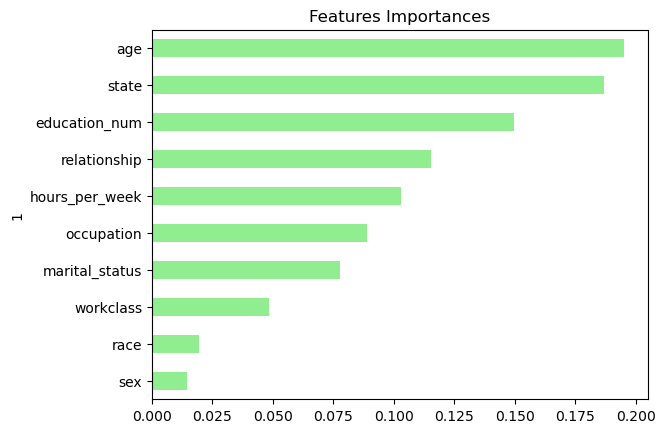

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# importances_df
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [19]:
importances_df

,Feature Importances
1,
age,0.195272
state,0.186749
education_num,0.149700
relationship,0.115571
hours_per_week,0.103163
occupation,0.089120
marital_status,0.077747
workclass,0.048637
race,0.019331


### Add test results to original dataframe

In [20]:
# Adding Results to X_test dataframe
# Adding to X-Test becasue it has the same index as original dataframe
model_name=[]
for value in predictions:
    model_name.append('RandomForest')

X_test['Results'] = predictions
X_test['Model'] = model_name

# Drop unnecessary columns
X_test = X_test.drop(columns = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'hours_per_week', 'state'])

X_test.head()


,Results,Model
3314,<=50K,RandomForest
19677,>50K,RandomForest
29448,>50K,RandomForest
3581,<=50K,RandomForest
25490,<=50K,RandomForest


In [21]:
# Copy original reprocess dataset
census_copy_df = census_df.copy()

#Join result data to original
census_copy_df = census_copy_df.join(X_test)
census_copy_df = census_copy_df.dropna(axis=0, how='any')
census_copy_df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state,Results,Model
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,Maryland,<=50K,RandomForest
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,Florida,<=50K,RandomForest
13,32,Private,14,Separated,Exec-managerial,Not-in-family,White,Male,55,>50K,New Hampshire,>50K,RandomForest
16,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,76,>50K,Wyoming,<=50K,RandomForest
22,61,Private,9,Divorced,Sales,Unmarried,White,Female,25,<=50K,New York,<=50K,RandomForest
26,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,<=50K,Colorado,<=50K,RandomForest
27,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,40,<=50K,Montana,<=50K,RandomForest
28,37,Self-emp-inc,6,Never-married,Transport-moving,Not-in-family,White,Male,50,>50K,Colorado,<=50K,RandomForest
30,23,Private,10,Separated,Other-service,Not-in-family,White,Male,40,>50K,New York,<=50K,RandomForest
36,53,Private,9,Never-married,Sales,Not-in-family,White,Male,48,>50K,Utah,<=50K,RandomForest


In [22]:
# Export
census_copy_df.to_csv('../Data/RandomForest.csv', index_label='index')
